In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install -q pyomo
from pyomo.environ import *

# installing qpsolvers from web
!pip -q install qpsolvers[open_source_solvers]
from qpsolvers import solve_qp
!pip install -i https://pypi.gurobi.com gurobipy
import gurobipy as gp
# Install solver as well into collab session
!apt-get install -y -qq glpk-utils
!apt-get install -y -qq coinor-cbc


Looking in indexes: https://pypi.gurobi.com


Question 3A

3A Part 1

In [2]:
#3a   1. question: Best Search for optimal allocation of 3 stock portfolio

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

n = 101 #no. of random points to be taken

#generating randome samples of allocation
samples = []
w1 = np.linspace(0,1,n)
w2 = np.linspace(0,1,n)
for one in w1:
  for two in w2:
    if(one+two <=1):
      samples.append((one,two,1- one -two))

In [4]:
len(samples)

5151

In [5]:
#risk function

def risk(sample, covariance):
  return 0.5*np.matmul(sample.transpose(), np.matmul(covariance, sample))

#given data
Mo= 0.03
M = np.array([0.0427,0.0015,0.0285])
covariance = np.array([[0.1,0.0018, 0.0011],[0.0018,0.1044,0.0026],[0.0011,0.00026,0.1411]])


#defining return function
def preturn(sample, M):
  return np.matmul(sample.transpose(), M)


#storing valid results
risks = []
returns = []
allocation = []
for sample in samples:
  w = np.array([sample[0],sample[1],sample[2]])
  #checking constraint
  if np.matmul(w.transpose(), M) >= Mo:
    allocation.append(w)
    risks.append(risk(w,covariance))
    returns.append(preturn(w,M))





In [6]:
#least risk entry
min(risks)

0.021272084000000004

In [7]:
np.argmin(risks)

461

In [8]:
allocation[np.argmin(risks)]

array([0.51, 0.21, 0.28])

In [9]:
returns[np.argmin(risks)]

0.030072

In [10]:
len(allocation)

1440

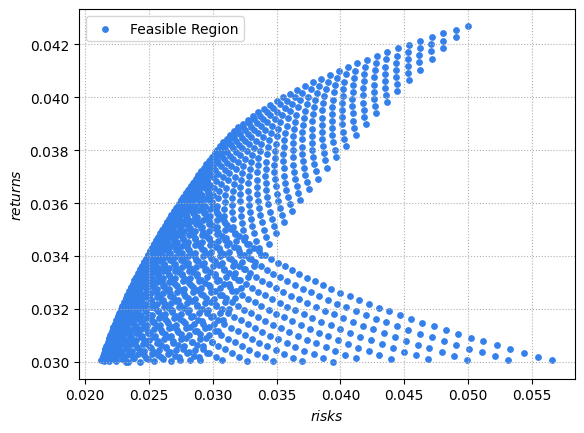

In [11]:
#printing the feasible region we get
plt.scatter(risks,returns,color = "#3480eb", s =15)
plt.xlabel("$risks$")
plt.ylabel("$returns$")
plt.grid(linestyle = ":")
plt.legend(labels = ["Feasible Region"])

In [12]:
paretopoints = []
n = len(allocation)
for i in range(n):
  flag = 0
  for j in range(n):
    if i!=j:
      if ((risks[i] > risks[j]) and (returns[i] <= returns[j])) or ((risks[i] >= risks[j]) and (returns[i] < returns[j])):
        flag = 1
        break
  if flag == 0:
    paretopoints.append(allocation[i])

In [13]:
len(paretopoints)

147

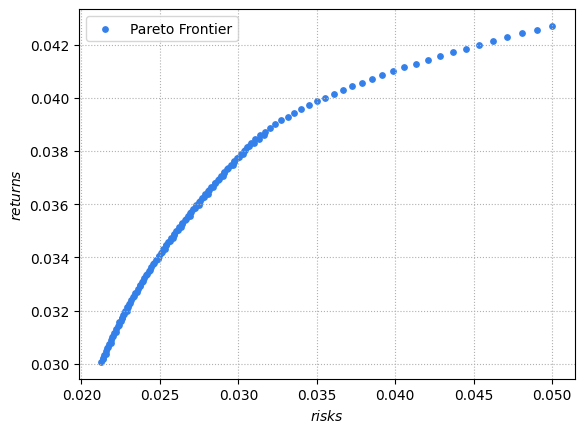

In [14]:
returnspareto = [preturn(sample,M) for sample in paretopoints]
riskspareto = [risk(sample, covariance) for sample in paretopoints]
# pareto for return risk tradeoff

plt.scatter(riskspareto, returnspareto,color = "#3480eb", s =15)
plt.xlabel("$risks$")
plt.ylabel("$returns$")
plt.grid(linestyle = ":")
plt.legend(labels = ["Pareto Frontier"])

3A Part 3

In [15]:
#finding optimal allocation using ;risk avertion

lamda = [10**((v/20)-1) for v in range(1,101)]


In [16]:
print(lamda)

[0.11220184543019636, 0.12589254117941673, 0.14125375446227545, 0.15848931924611134, 0.1778279410038923, 0.19952623149688797, 0.22387211385683395, 0.251188643150958, 0.28183829312644537, 0.31622776601683794, 0.35481338923357547, 0.3981071705534972, 0.44668359215096315, 0.5011872336272722, 0.5623413251903491, 0.6309573444801934, 0.7079457843841379, 0.7943282347242815, 0.8912509381337455, 1.0, 1.1220184543019636, 1.2589254117941675, 1.412537544622754, 1.5848931924611134, 1.7782794100389228, 1.9952623149688797, 2.23872113856834, 2.5118864315095797, 2.8183829312644537, 3.1622776601683795, 3.548133892335755, 3.981071705534973, 4.46683592150963, 5.011872336272722, 5.623413251903491, 6.309573444801933, 7.07945784384138, 7.943282347242813, 8.912509381337454, 10.0, 11.220184543019629, 12.589254117941675, 14.12537544622754, 15.848931924611142, 17.78279410038923, 19.952623149688787, 22.3872113856834, 25.118864315095795, 28.18382931264455, 31.622776601683793, 35.481338923357534, 39.810717055349734

In [17]:
# below is a standard snip to code which we can follow to define model structure using gurobi

M = np.array([0.0427,0.0015,0.0285])
covariance = np.array([[0.1,0.0018, 0.0011],[0.0018,0.1044,0.0026],[0.0011,0.00026,0.1411]])
avertionresults = []
for lm in lamda:
  P  = lm*covariance
  q = -M
  b=np.array([1])
  A = np.array([1, 1, 1])
  lower = np.array([0,0,0])
  res = solve_qp(P, q, G=None, h=None, A = A, b = b, lb=lower, ub=None, solver = "osqp")
  avertionresults.append(res)

/usr/local/lib/python3.10/dist-packages/qpsolvers/conversions/ensure_sparse_matrices.py:38: UserWarning: Converted P to scipy.sparse.csc.csc_matrix
For best performance, build P as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/qpsolvers/conversions/ensure_sparse_matrices.py:38: UserWarning: Converted A to scipy.sparse.csc.csc_matrix
For best performance, build A as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(


In [18]:
avertionresults[1:5]

[array([ 1.00008123e+00, -3.66137758e-05, -4.45868278e-05]),
 array([ 1.00295778, -0.00166064, -0.00158207]),
 array([ 0.96181114, -0.00155688,  0.03946662]),
 array([ 9.20273380e-01, -6.01997596e-06,  7.97326438e-02])]

In [19]:
#these are allocation values using this we create returns and risk correpondinly

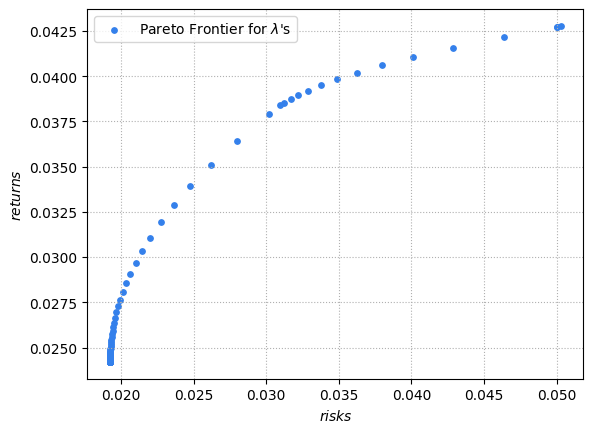

In [20]:
returnslamda = [preturn(res,M) for res in avertionresults]
riskslamda = [risk(res, covariance) for res in avertionresults]

# calculating pareto points
paretopoints = []
n = len(avertionresults)
for i in range(n):
  flag = 0
  for j in range(n):
    if i!=j:
      if ((riskslamda[i] > riskslamda[j]) and (returnslamda[i] <= returnslamda[j])) or ((riskslamda[i] >= riskslamda[j]) and (returnslamda[i] < returnslamda[j])):
        flag = 1
        break
  if flag == 0:
    paretopoints.append(avertionresults[i])

# pareto for return risk tradeoff
returnspareto = [preturn(sample,M) for sample in paretopoints]
riskspareto = [risk(sample, covariance) for sample in paretopoints]
# pareto for return risk tradeoff


plt.scatter(riskspareto, returnspareto,color = "#3480eb", s =15)
plt.xlabel("$risks$")
plt.ylabel("$returns$")
plt.grid(linestyle = ":")
plt.legend(labels = [r"Pareto Frontier for $\lambda$'s"])

In [21]:
#3a Part 5

In [22]:
# below is a standard snip to code which we can follow to define model structure using gurobi

M = np.array([0.0427,0.0015,0.0285])
covariance = np.array([[0.1,0.0018, 0.0011],[0.0018,0.1044,0.0026],[0.0011,0.00026,0.1411]])
avertionresults = []
for lm in lamda:
  P  = lm*covariance
  q = -M
  b=np.array([1])
  A = np.array([1, 1, 1])
  res = solve_qp(P, q, G=None, h=None, A = A, b = b, lb=None, ub=None, solver = "osqp")
  avertionresults.append(res)

In [23]:
avertionresults[1:5]

[array([ 1.87523947, -1.40259489,  0.5270595 ]),
 array([ 1.71236745, -1.2111871 ,  0.49852502]),
 array([ 1.56720772, -1.04059461,  0.47309373]),
 array([ 1.4378341 , -0.88855378,  0.45042814])]

In [24]:
#some optimal results are negative.

In [25]:
#these are allocation values using this we create returns and risk correpondinly

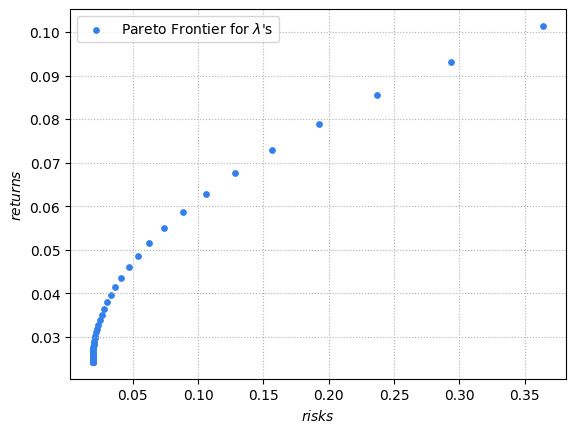

In [26]:
returnslamda = [preturn(res,M) for res in avertionresults]
riskslamda = [risk(res, covariance) for res in avertionresults]

# calculating pareto points
paretopoints = []
n = len(avertionresults)
for i in range(n):
  flag = 0
  for j in range(n):
    if i!=j:
      if ((riskslamda[i] > riskslamda[j]) and (returnslamda[i] <= returnslamda[j])) or ((riskslamda[i] >= riskslamda[j]) and (returnslamda[i] < returnslamda[j])):
        flag = 1
        break
  if flag == 0:
    paretopoints.append(avertionresults[i])

# pareto for return risk tradeoff
returnspareto = [preturn(sample,M) for sample in paretopoints]
riskspareto = [risk(sample, covariance) for sample in paretopoints]
# pareto for return risk tradeoff


plt.scatter(riskspareto, returnspareto,color = "#3480eb", s =15)
plt.xlabel("$risks$")
plt.ylabel("$returns$")
plt.grid(linestyle = ":")
plt.legend(labels = [r"Pareto Frontier for $\lambda$'s"])

Question 3B